## Model Evaluation


===== Model Evaluation: DecisionTree =====
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.84      0.91    131902
           1       0.44      0.91      0.59     18098

    accuracy                           0.85    150000
   macro avg       0.71      0.87      0.75    150000
weighted avg       0.92      0.85      0.87    150000

Confusion Matrix:
[[110700  21202]
 [  1696  16402]]
ROC-AUC Score: 0.9357
Precision-Recall Curve (length=326 points)


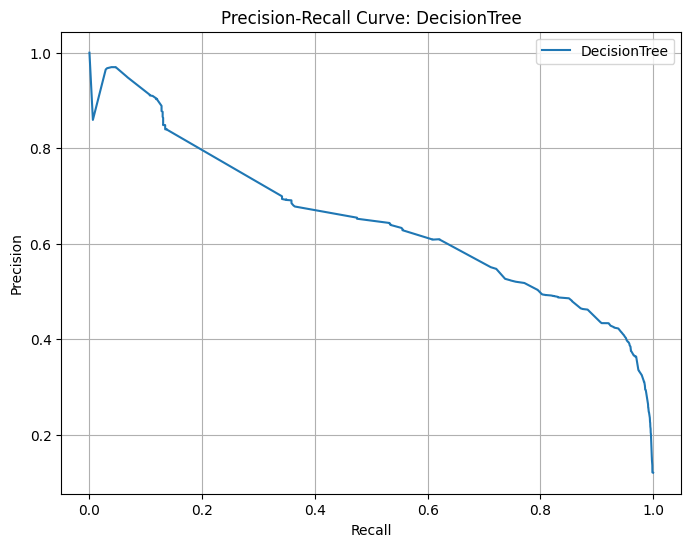

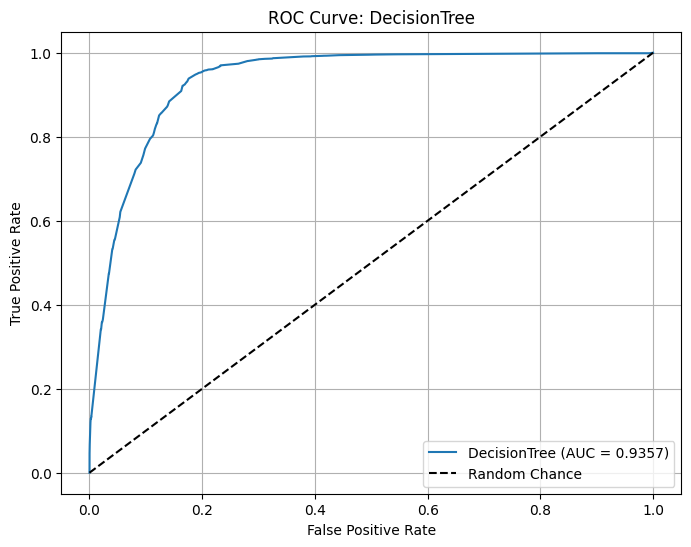


===== Model Evaluation: KNN =====
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.81      0.88    131902
           1       0.38      0.84      0.52     18098

    accuracy                           0.81    150000
   macro avg       0.67      0.83      0.70    150000
weighted avg       0.90      0.81      0.84    150000

Confusion Matrix:
[[106510  25392]
 [  2837  15261]]
ROC-AUC Score: 0.8934
Precision-Recall Curve (length=64509 points)


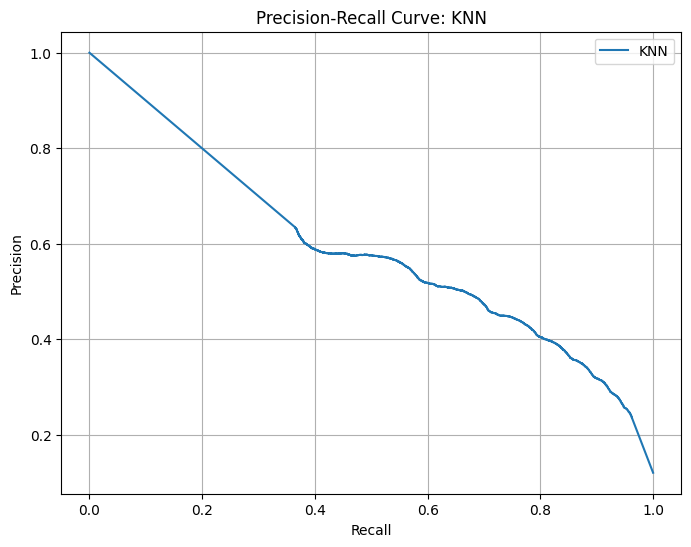

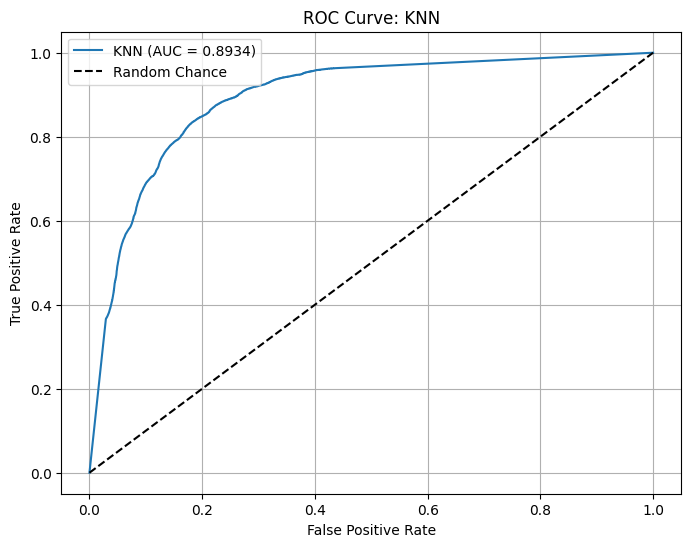


===== Model Evaluation: LinearSVC =====
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.80      0.89    131902
           1       0.40      0.94      0.56     18098

    accuracy                           0.82    150000
   macro avg       0.69      0.87      0.72    150000
weighted avg       0.92      0.82      0.85    150000

Confusion Matrix:
[[106077  25825]
 [  1065  17033]]
ROC-AUC Score: 0.9373
Precision-Recall Curve (length=150001 points)


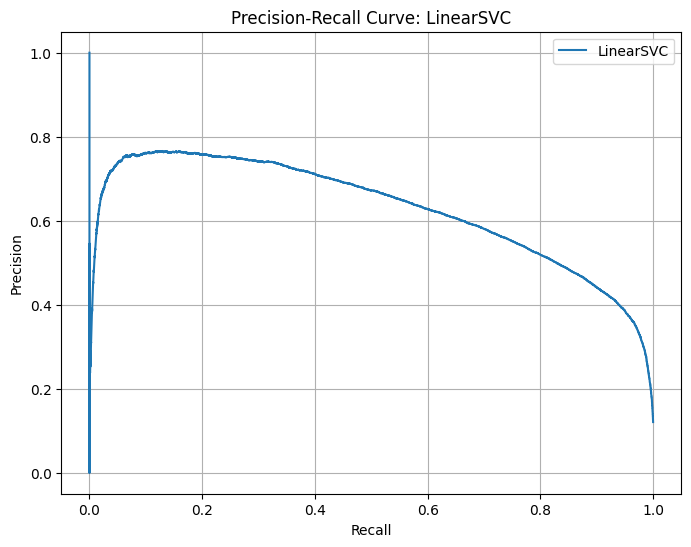

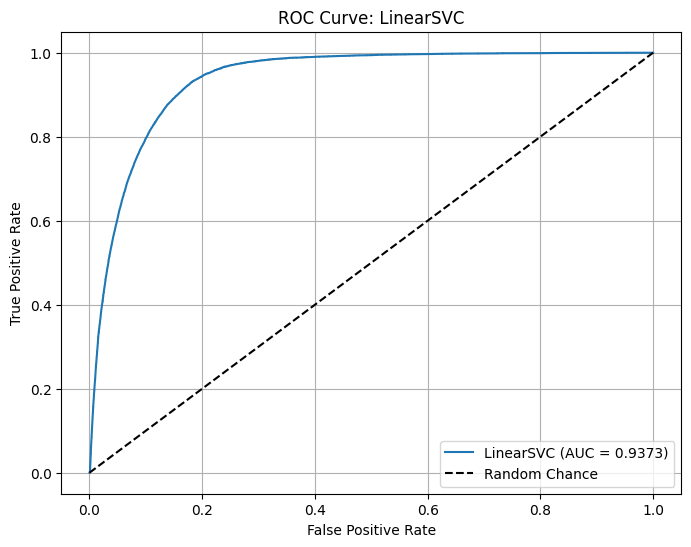


===== Model Evaluation: LogisticRegression =====
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.80      0.88    131902
           1       0.39      0.94      0.55     18098

    accuracy                           0.82    150000
   macro avg       0.69      0.87      0.72    150000
weighted avg       0.92      0.82      0.84    150000

Confusion Matrix:
[[105428  26474]
 [  1045  17053]]
ROC-AUC Score: 0.9365
Precision-Recall Curve (length=150001 points)


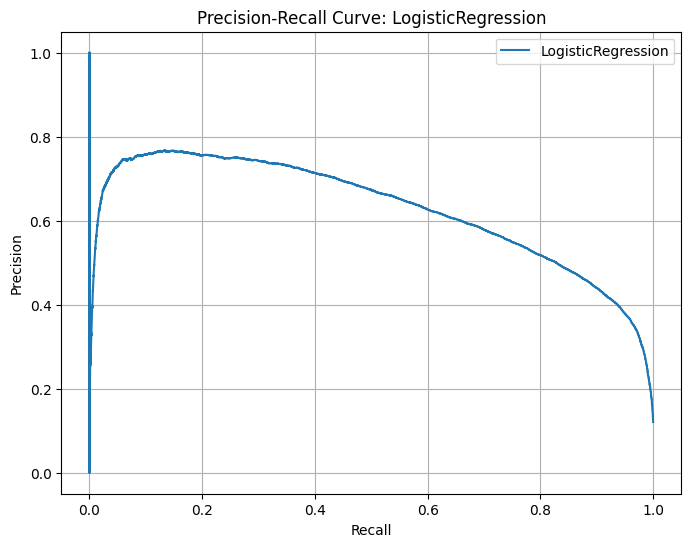

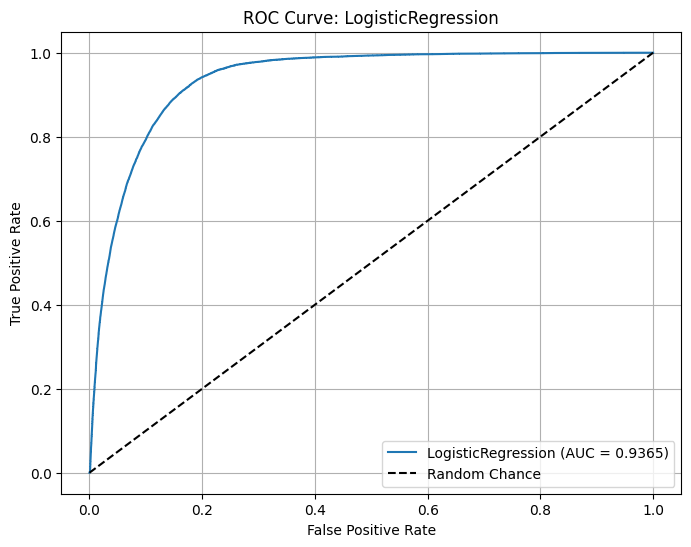


===== Model Evaluation: NaiveBayes =====
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.83      0.89    131902
           1       0.37      0.71      0.48     18098

    accuracy                           0.82    150000
   macro avg       0.66      0.77      0.69    150000
weighted avg       0.88      0.82      0.84    150000

Confusion Matrix:
[[110045  21857]
 [  5315  12783]]
ROC-AUC Score: 0.8236
Precision-Recall Curve (length=135094 points)


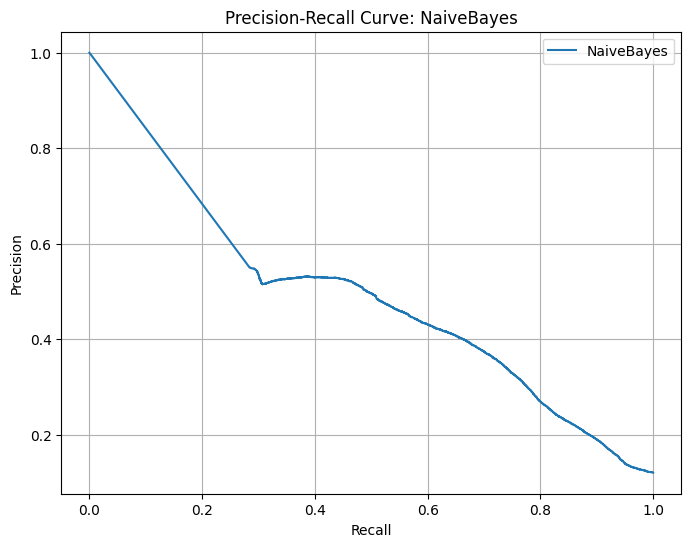

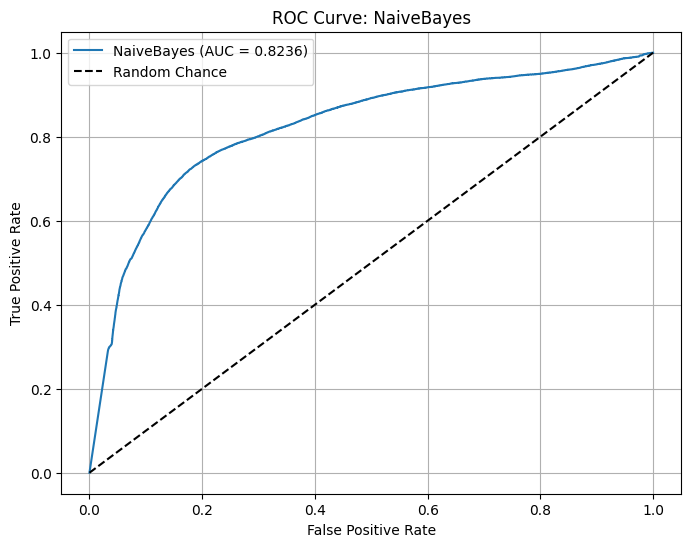


===== Model Evaluation: RandomForest =====
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95    131902
           1       0.63      0.70      0.66     18098

    accuracy                           0.91    150000
   macro avg       0.79      0.82      0.81    150000
weighted avg       0.92      0.91      0.92    150000

Confusion Matrix:
[[124423   7479]
 [  5494  12604]]
ROC-AUC Score: 0.9502
Precision-Recall Curve (length=111933 points)


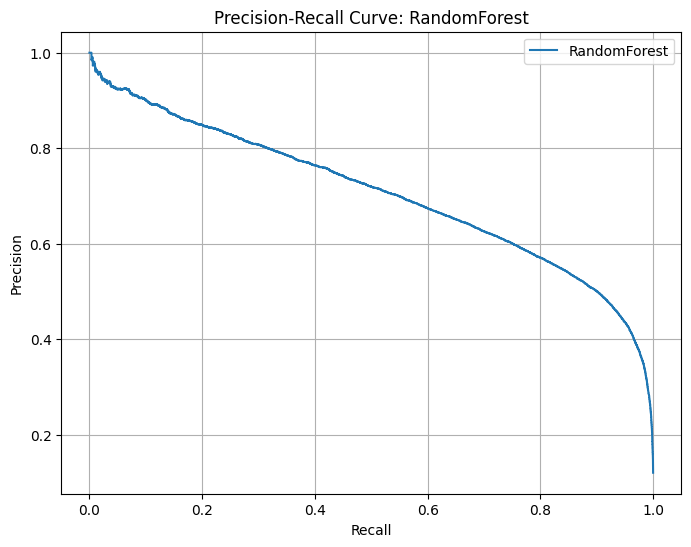

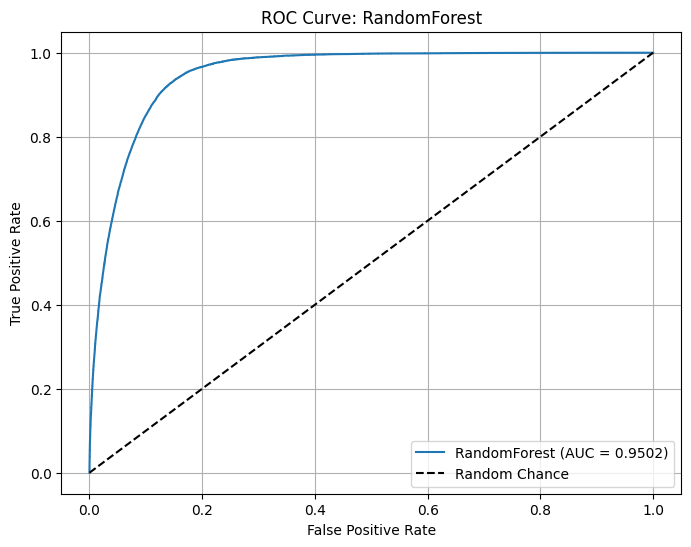

In [1]:
import os
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    precision_recall_curve, roc_curve
)
from sklearn.model_selection import learning_curve
import numpy as np

# Loading test data
X_test = joblib.load("X_test.joblib")
y_test = joblib.load("y_test.joblib")

# Loading train data
X_train = joblib.load("X_train.joblib")
y_train = joblib.load("y_train.joblib")

# Loading models from base_models directory
model_dir = "tuned_models"
trained_models = {}

for file in os.listdir(model_dir):
    if file.endswith(".joblib"):
        model_name = file.replace(".joblib", "")
        model_path = os.path.join(model_dir, file)
        trained_models[model_name] = joblib.load(model_path)

# Evaluate each model
for model_name, model in trained_models.items():
    print(f"\n===== Model Evaluation: {model_name} =====")

    # Predict classes
    y_pred = model.predict(X_test)

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Checking if the model supports predict_proba
    if hasattr(model.named_steps['classifier'], "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        # fallback for models like LinearSVC
        try:
            y_score = model.decision_function(X_test)
            from sklearn.preprocessing import MinMaxScaler
            scaler = MinMaxScaler()
            y_prob = scaler.fit_transform(y_score.reshape(-1, 1)).flatten()
        except Exception as e:
            print(f" Could not compute probabilities for {model_name}: {e}")
            continue

    # ROC-AUC
    print(f"ROC-AUC Score: {roc_auc_score(y_test, y_prob):.4f}")

    # Precision-Recall Curve
    precision, recall, thresholds_pr = precision_recall_curve(y_test, y_prob)
    print(f"Precision-Recall Curve (length={len(precision)} points)")

    # ROC Curve
    fpr, tpr, thresholds_roc = roc_curve(y_test, y_prob)

    # Plot Precision-Recall Curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f"{model_name}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve: {model_name}")
    plt.legend()
    plt.grid()
    plt.show()

    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc_score(y_test, y_prob):.4f})")
    plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve: {model_name}")
    plt.legend()
    plt.grid()
    plt.show()

 


# Learning curve with F1

Generating Learning Curve for DecisionTree...


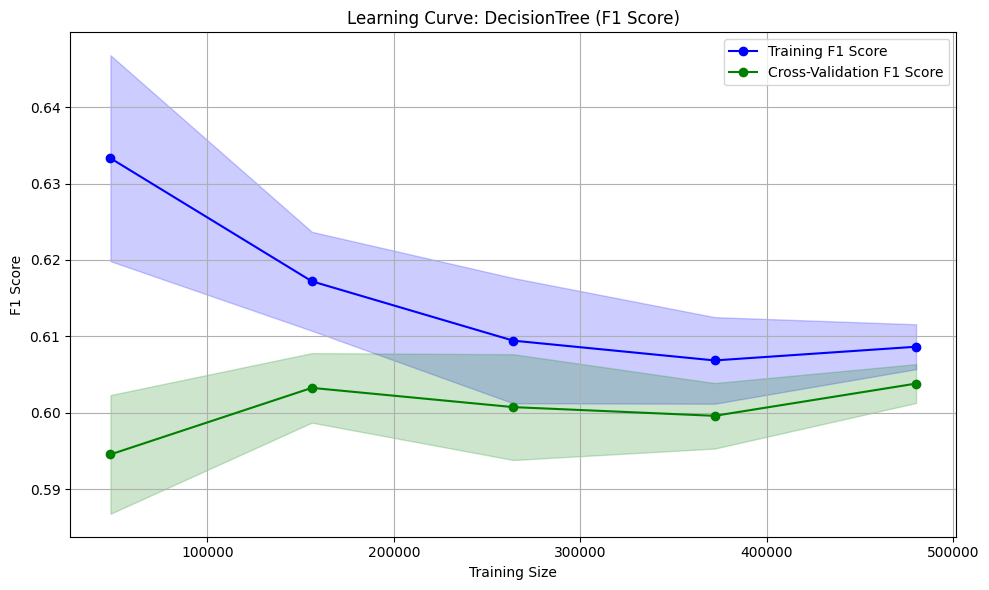

Generating Learning Curve for KNN...


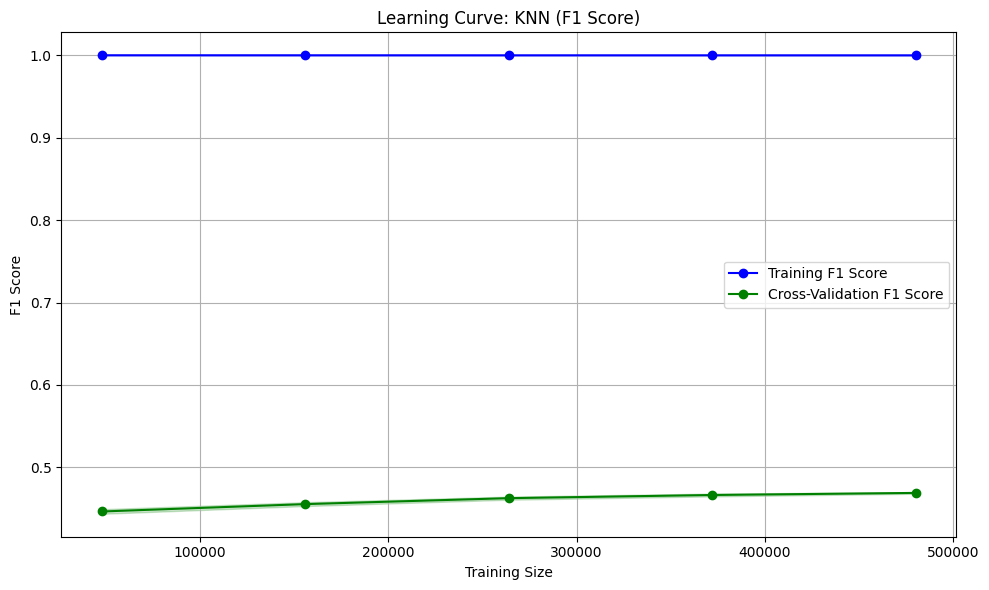

Generating Learning Curve for LinearSVC...


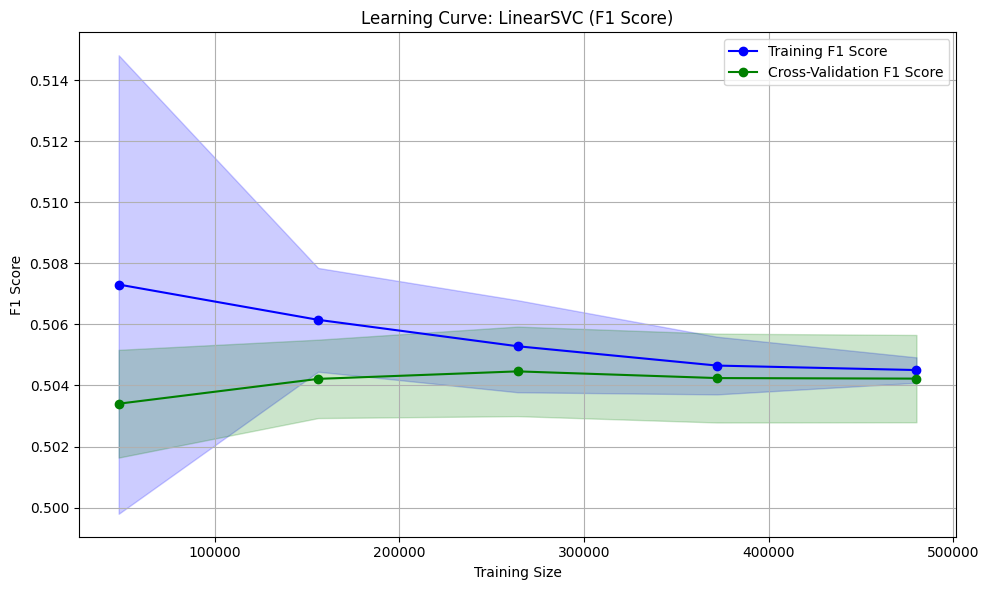

Generating Learning Curve for LogisticRegression...


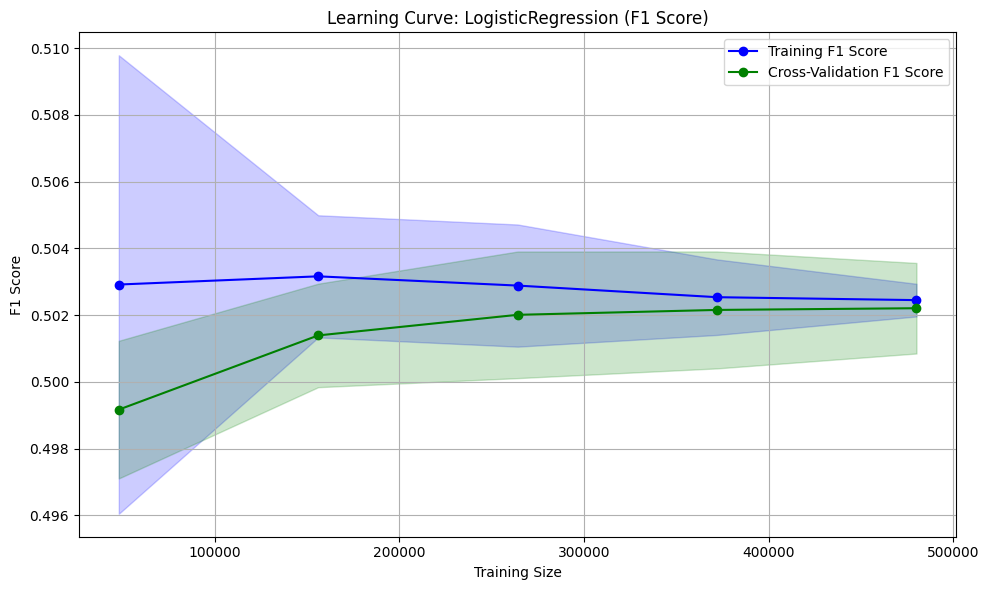

Generating Learning Curve for NaiveBayes...


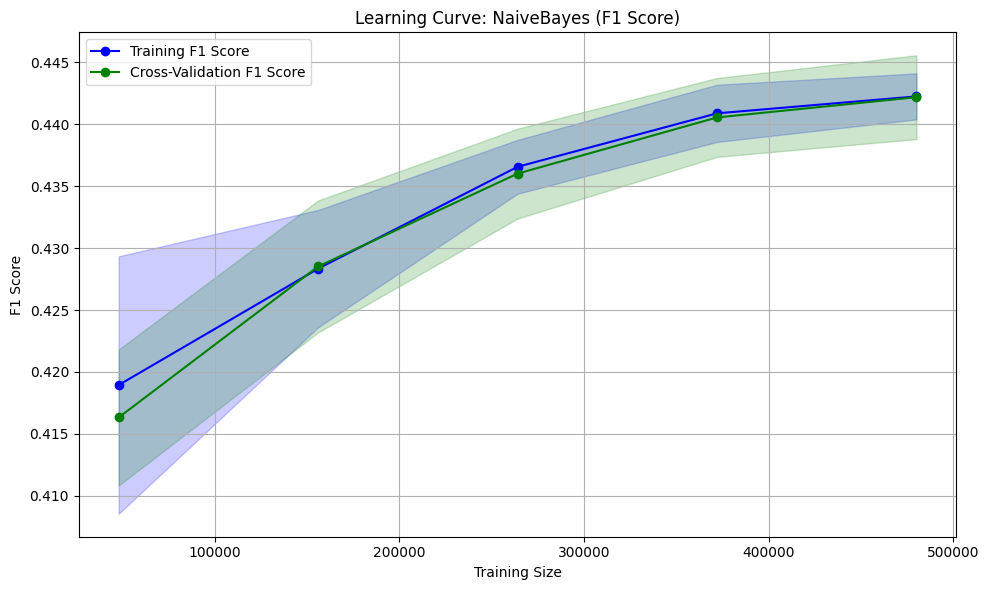

Generating Learning Curve for RandomForest...


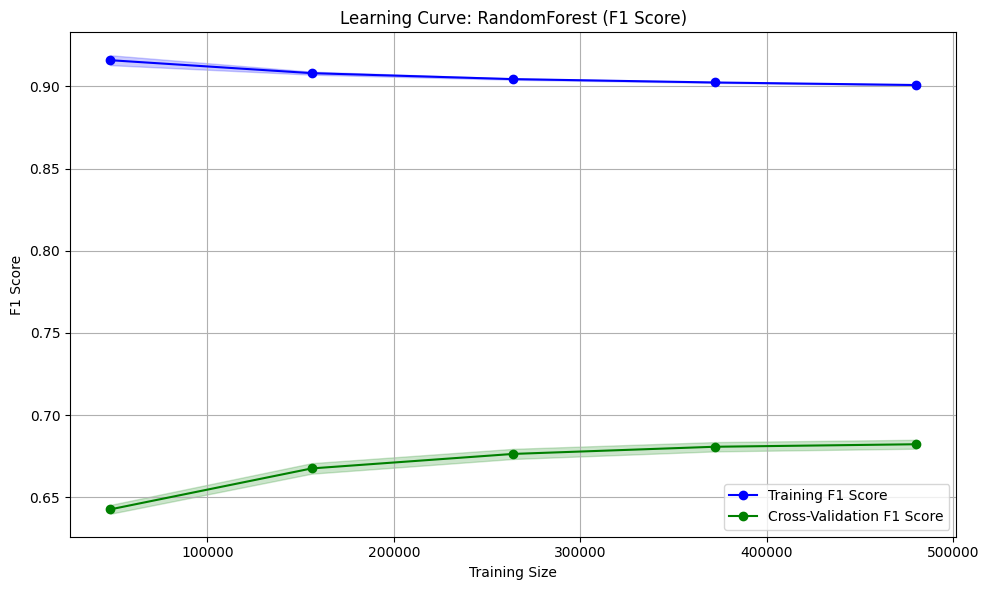

In [2]:
# Loop through each model and plot the learning curve
for model_name, model in trained_models.items():
    print(f"Generating Learning Curve for {model_name}...")

    # Learning Curve (F1 Score)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator=model,
        X=X_train,
        y=y_train,
        cv=5,
        scoring='f1',
        n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 5),
        shuffle=True,
        random_state=42
    )

    # Calculate mean and standard deviation for training and testing F1 scores
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot Learning Curve for F1 Score
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training F1 Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label='Cross-Validation F1 Score')

    # Plot the standard deviation as shaded areas
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color='blue', alpha=0.2)
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color='green', alpha=0.2)

    plt.title(f"Learning Curve: {model_name} (F1 Score)")
    plt.xlabel('Training Size')
    plt.ylabel('F1 Score')
    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'learning_curve_{model_name}.png')  # Save the plot with the model's name
    plt.show()

# Learning Curve with Accuracy

Generating Learning Curve for DecisionTree...


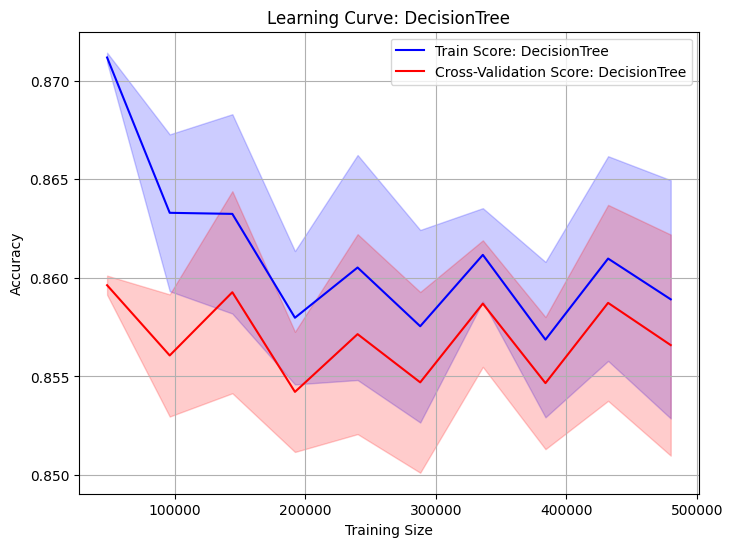

Generating Learning Curve for KNN...


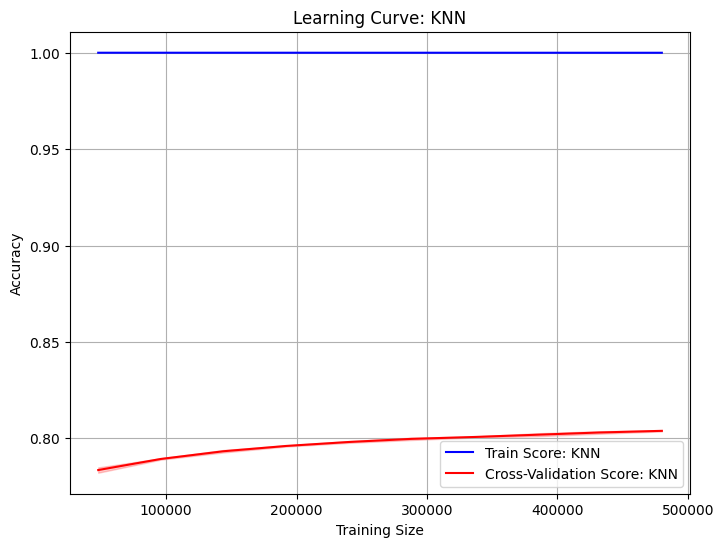

Generating Learning Curve for LinearSVC...


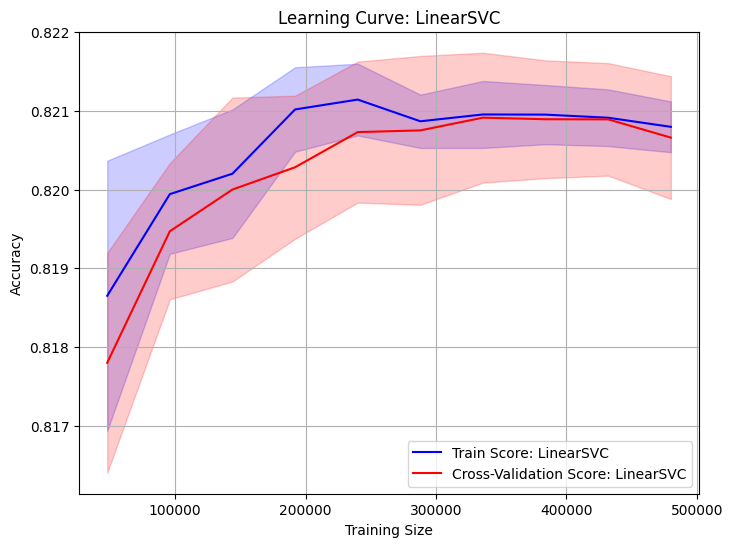

Generating Learning Curve for LogisticRegression...


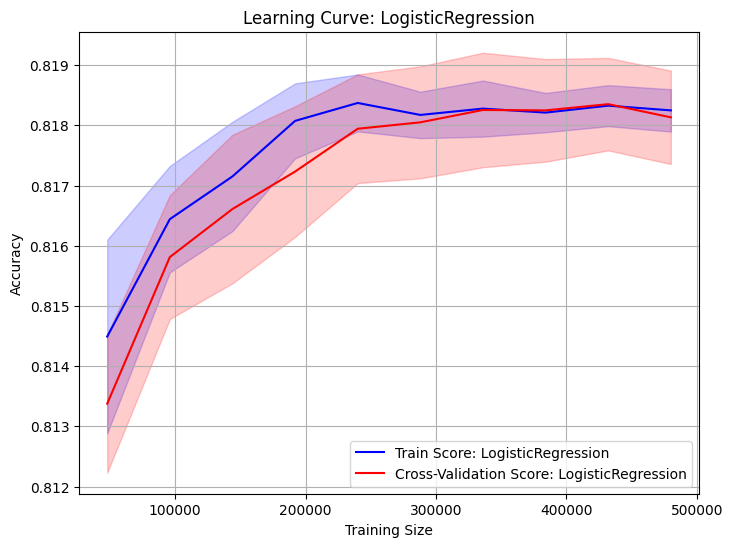

Generating Learning Curve for NaiveBayes...


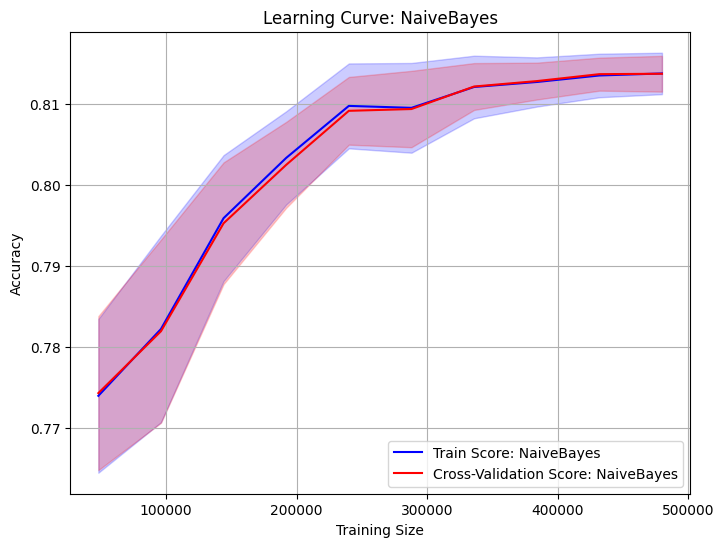

Generating Learning Curve for RandomForest...


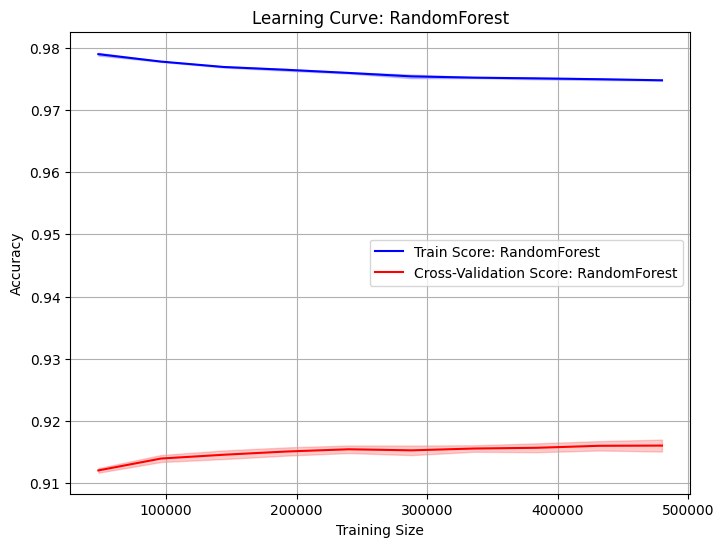

In [3]:
for model_name, model in trained_models.items():
    
    # Learning Curve with acc
    print(f"Generating Learning Curve for {model_name}...")
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # Calculate mean and standard deviation for training and testing scores
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot Learning Curve
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, label=f"Train Score: {model_name}", color='blue')
    plt.plot(train_sizes, test_mean, label=f"Cross-Validation Score: {model_name}", color='red')

    # Plot the standard deviation as shaded areas
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='red', alpha=0.2)

    plt.title(f"Learning Curve: {model_name}")
    plt.xlabel("Training Size")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid()
    plt.show()
